In [1]:
# import pandas library
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading csv file
data = pd.read_csv("Heart.csv")
# creating a dataframe of it
data = pd.DataFrame(data)
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
# Datatype of each column
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [4]:
# Information about each column data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [5]:
# Count ,min,max ,etc of each column
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
#Drop unnnamed column
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
#Finding null values in each column
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
ca_mean = data['Ca'].mean()
data['Ca'] = data['Ca'].fillna(ca_mean)
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [9]:
ca_mode = data['Thal'].mode()[0]
data['Thal'] = data['Thal'].fillna(ca_mode)
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [10]:
#Finding number of zeros in each column
for i in data:
  count = (data[i] == 0).sum()
  print('Zeros in column',i,'->', count)

Zeros in column Age -> 0
Zeros in column Sex -> 97
Zeros in column ChestPain -> 0
Zeros in column RestBP -> 0
Zeros in column Chol -> 0
Zeros in column Fbs -> 258
Zeros in column RestECG -> 151
Zeros in column MaxHR -> 0
Zeros in column ExAng -> 204
Zeros in column Oldpeak -> 99
Zeros in column Slope -> 0
Zeros in column Ca -> 176
Zeros in column Thal -> 0
Zeros in column AHD -> 0


In [11]:
#Label Encoding the 'AHD' column
le1=LabelEncoder()
data['AHD']=le1.fit_transform(data['AHD'])
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [12]:
le1=LabelEncoder()
data['Thal']=le1.fit_transform(data['Thal'])
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,1,0


In [13]:
le1=LabelEncoder()
data['ChestPain']=le1.fit_transform(data['ChestPain'])
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [14]:
# splitting data using train test split
x = data.drop(['AHD'], axis=1)
y = data.AHD
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [15]:
#Classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train,y_train)
y_pred=tc.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score :",accuracy_score(y_pred,y_train))
print("Confusion Matrix  :",confusion_matrix(y_pred,y_train))

Accuracy Score : 1.0
Confusion Matrix  : [[129   0]
 [  0 113]]


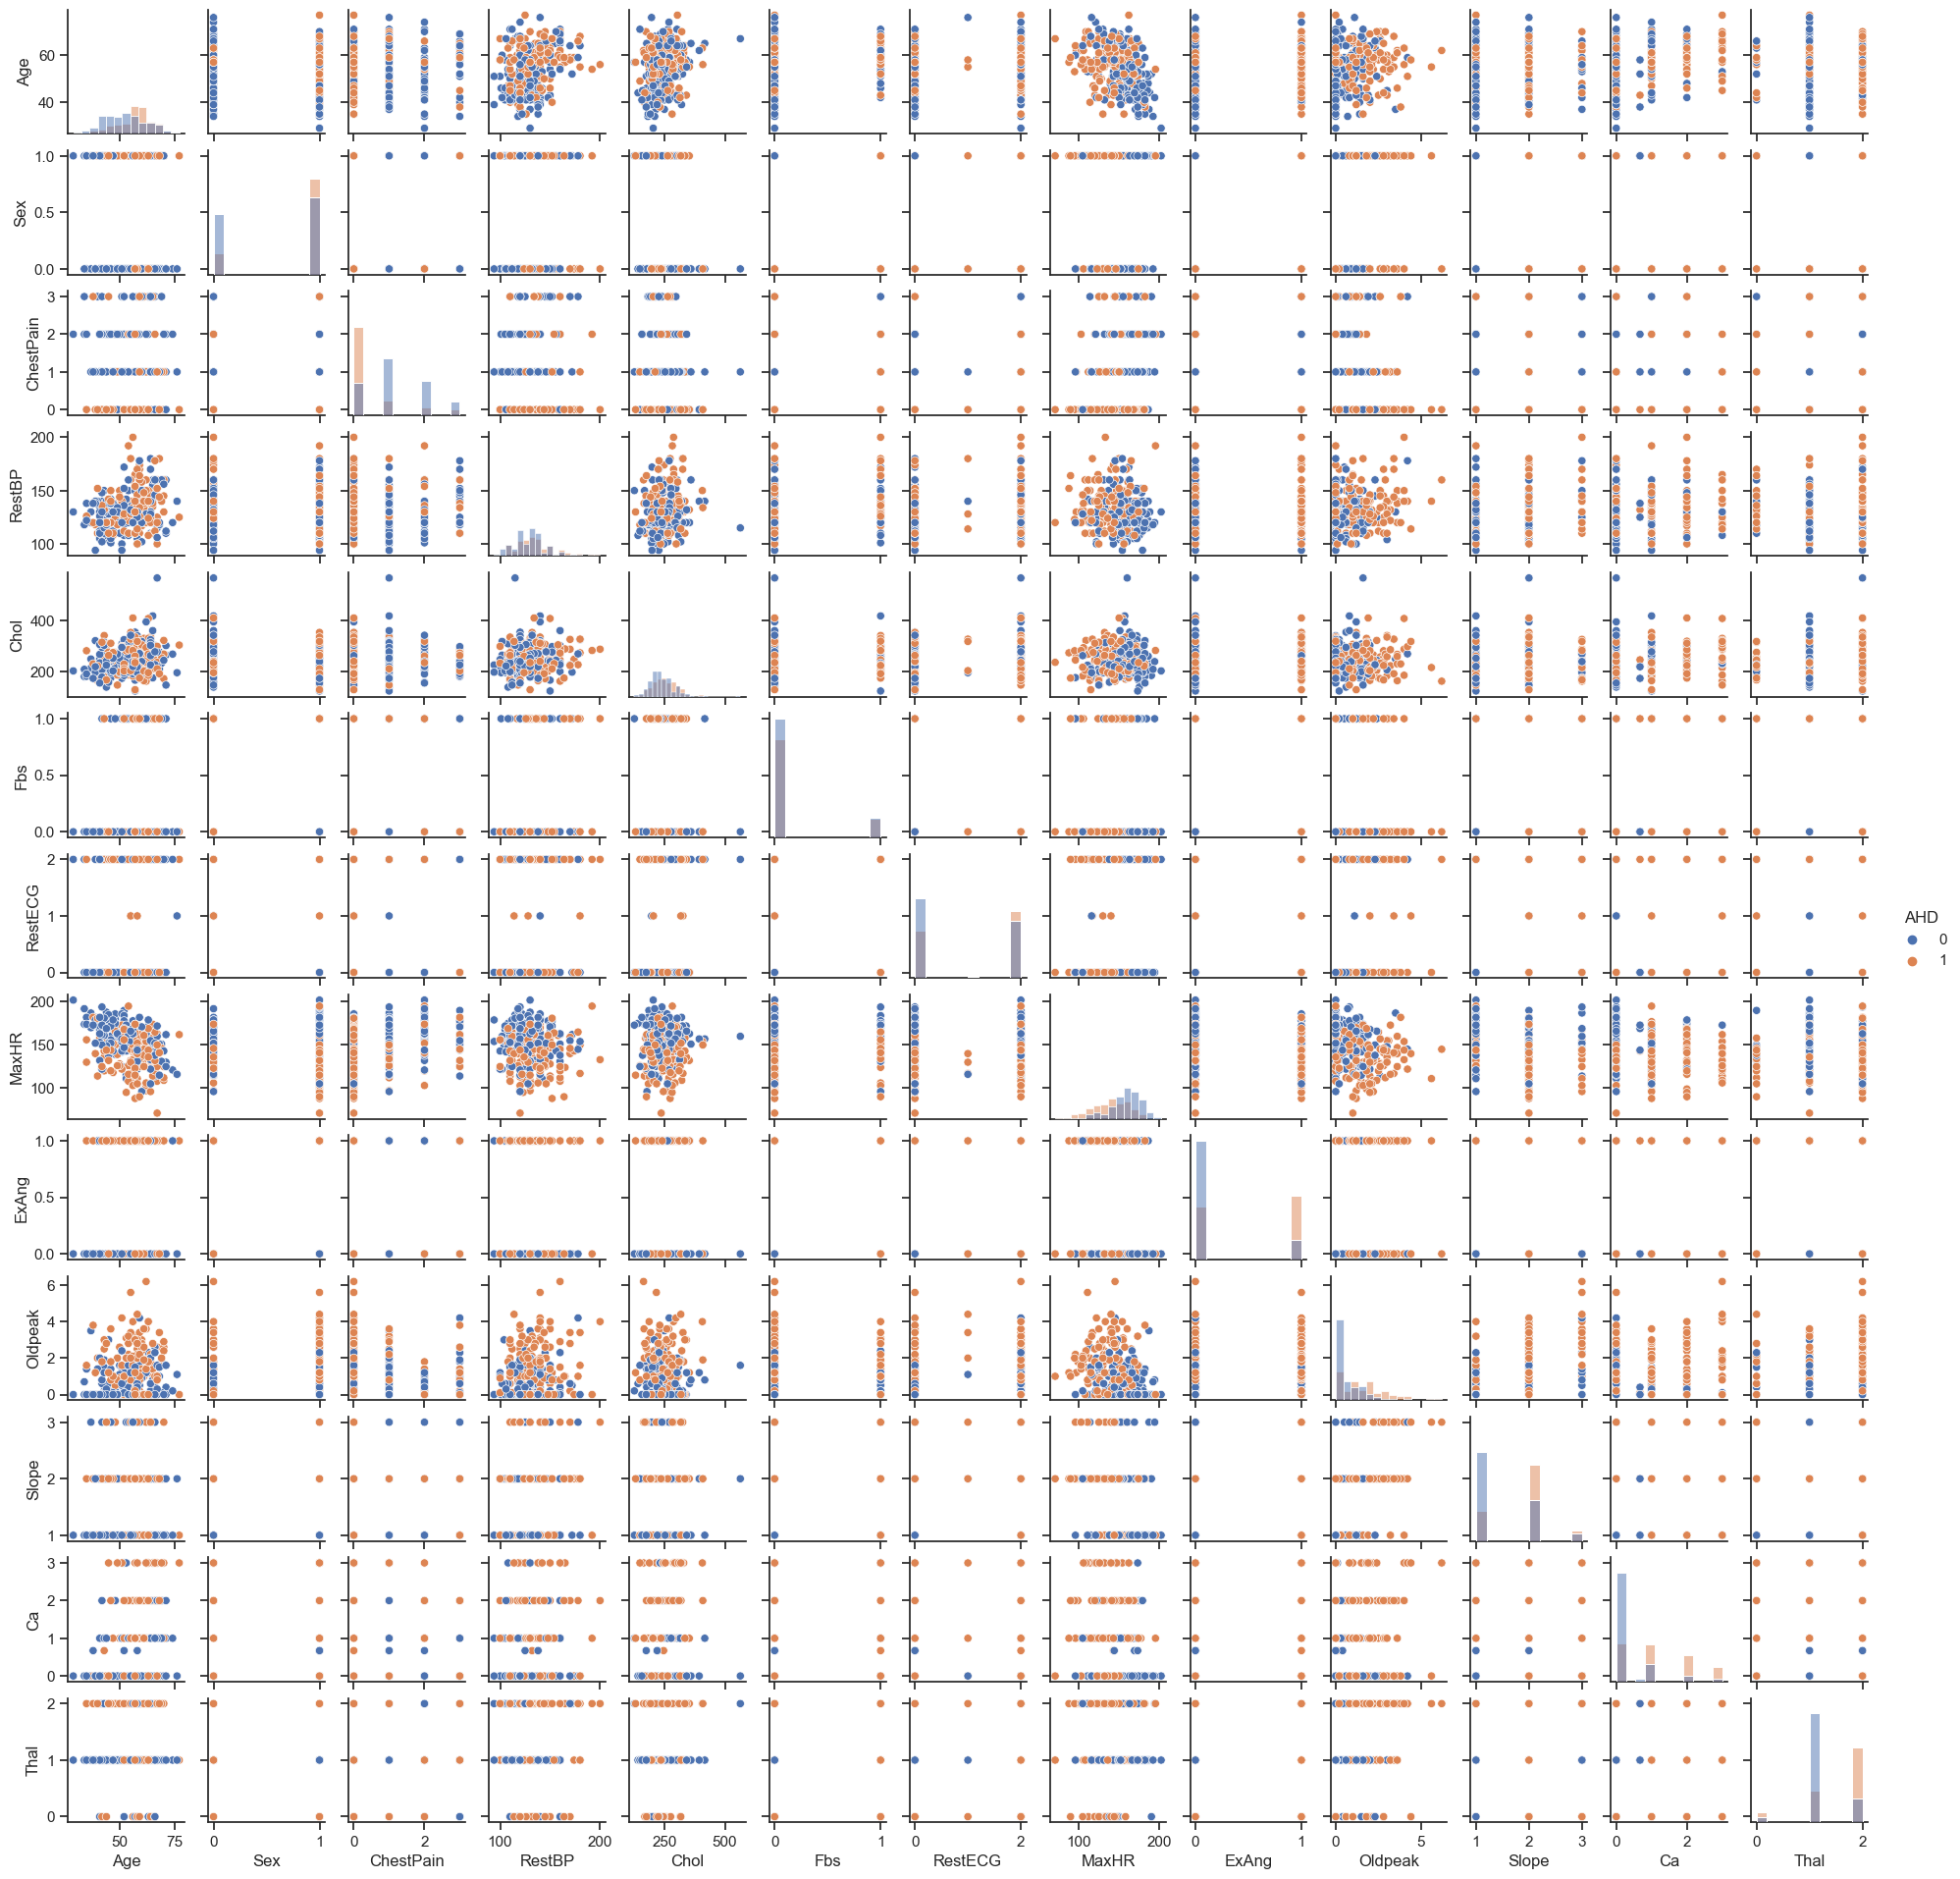

In [16]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="AHD", diag_kind="hist", height=1.5)

<AxesSubplot: xlabel='Age', ylabel='Count'>

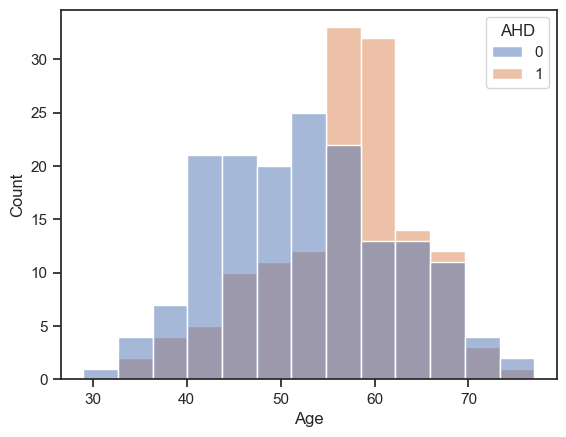

In [17]:
sns.histplot(data=data,x=data['Age'], hue='AHD')

<AxesSubplot: xlabel='Sex', ylabel='Count'>

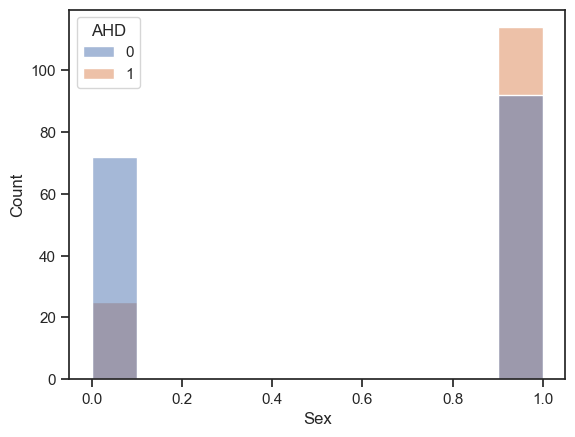

In [24]:
sns.histplot(data=data,x=data['Sex'], hue='AHD')

<AxesSubplot: xlabel='ChestPain', ylabel='Count'>

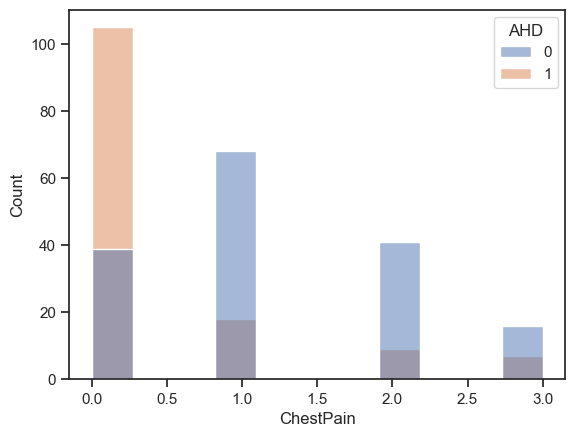

In [26]:
sns.histplot(data=data,x=data['ChestPain'], hue='AHD')

<AxesSubplot: xlabel='RestBP', ylabel='Count'>

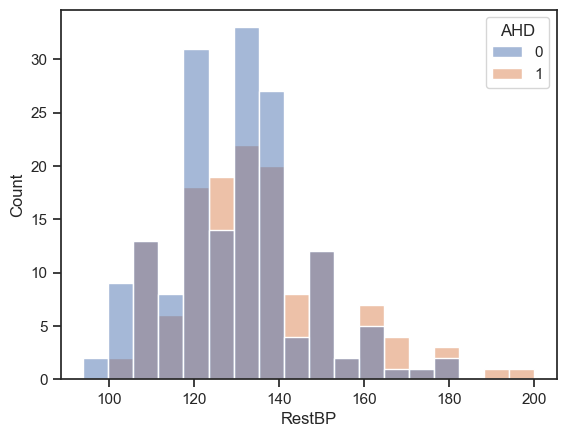

In [27]:
sns.histplot(data=data,x=data['RestBP'], hue='AHD')

<AxesSubplot: xlabel='Chol', ylabel='Count'>

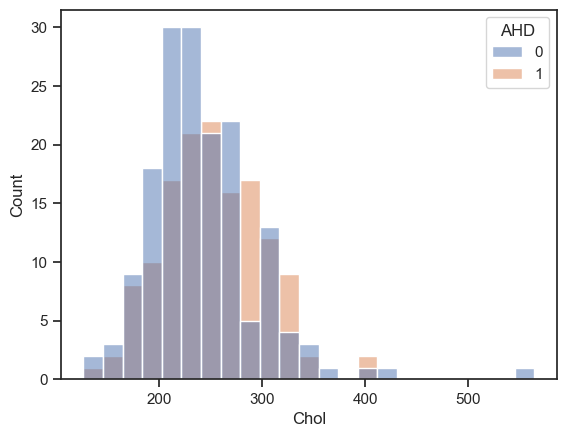

In [28]:
sns.histplot(data=data,x=data['Chol'], hue='AHD')

<AxesSubplot: xlabel='Fbs', ylabel='Count'>

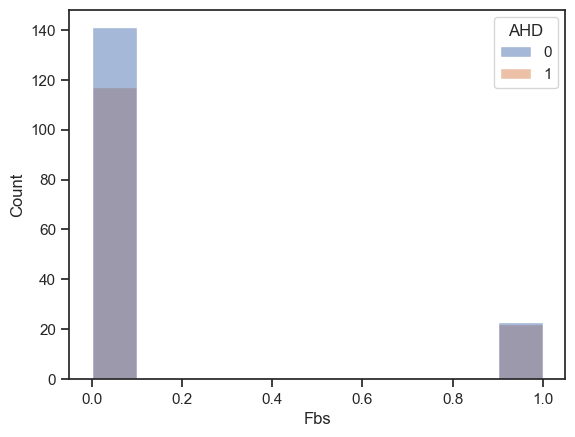

In [29]:
sns.histplot(data=data,x=data['Fbs'], hue='AHD')

In [30]:
data.columns


Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

<AxesSubplot: xlabel='RestECG', ylabel='Count'>

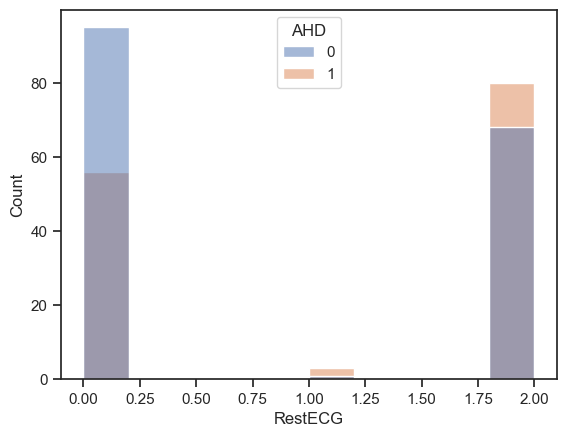

In [31]:
sns.histplot(data=data,x=data['RestECG'], hue='AHD')

<AxesSubplot: xlabel='MaxHR', ylabel='Count'>

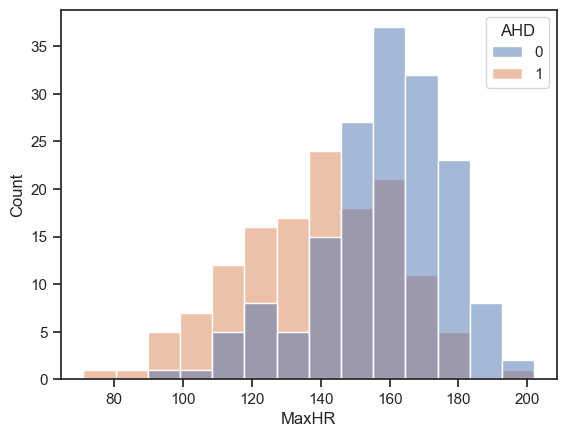

In [32]:
sns.histplot(data=data,x=data['MaxHR'], hue='AHD')

<AxesSubplot: xlabel='ExAng', ylabel='Count'>

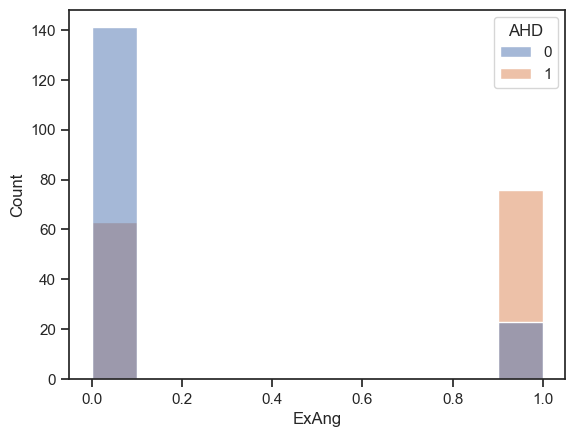

In [33]:
sns.histplot(data=data,x=data['ExAng'], hue='AHD')

<AxesSubplot: xlabel='Sex', ylabel='count'>

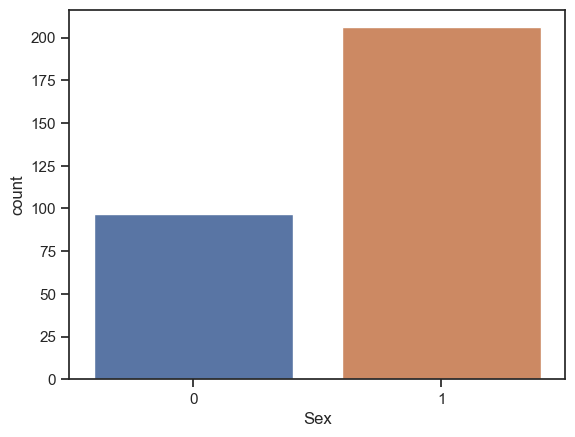

In [18]:
sns.countplot(data=data, x=data['Sex'])

<AxesSubplot: xlabel='ChestPain', ylabel='count'>

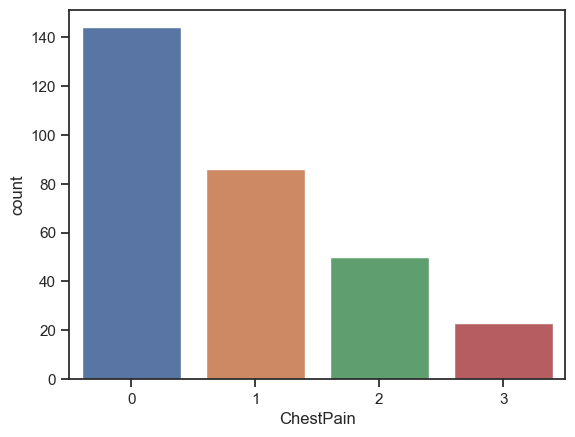

In [19]:
sns.countplot(data=data, x=data['ChestPain'])

<AxesSubplot: xlabel='RestECG', ylabel='count'>

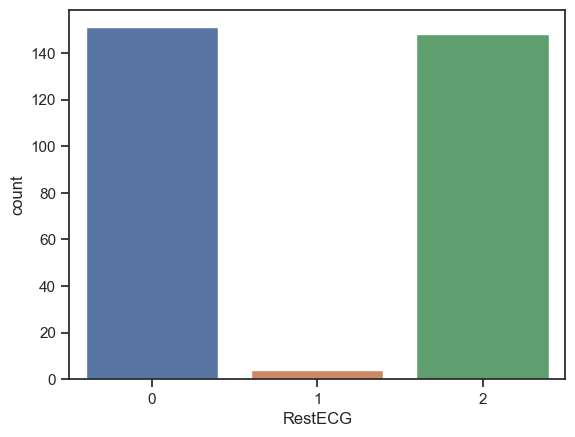

In [20]:
sns.countplot(data=data, x=data['RestECG'])

<AxesSubplot: xlabel='ExAng', ylabel='count'>

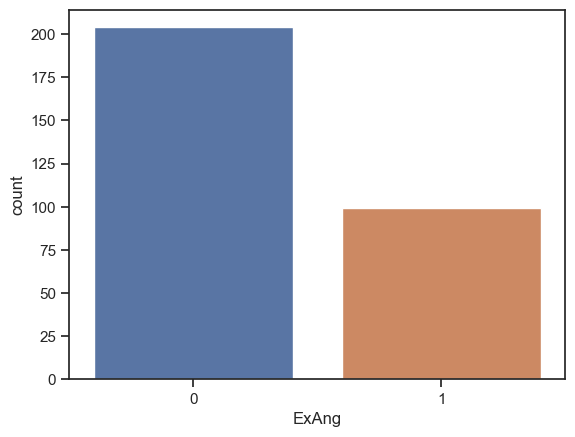

In [21]:
sns.countplot(data=data, x=data['ExAng'])

<AxesSubplot: xlabel='Age', ylabel='RestBP'>

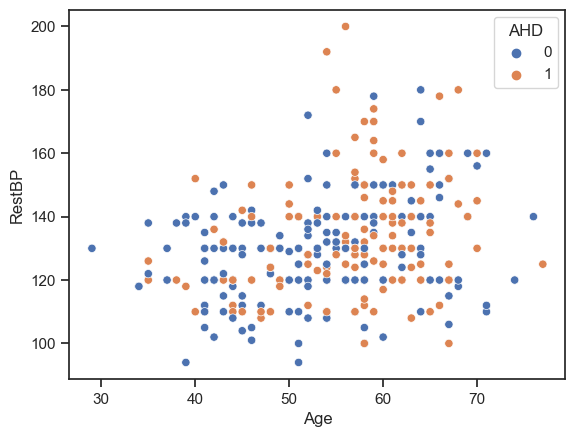

In [34]:
sns.scatterplot(data=data, x="Age", y="RestBP", hue="AHD")

<AxesSubplot: xlabel='Age', ylabel='Chol'>

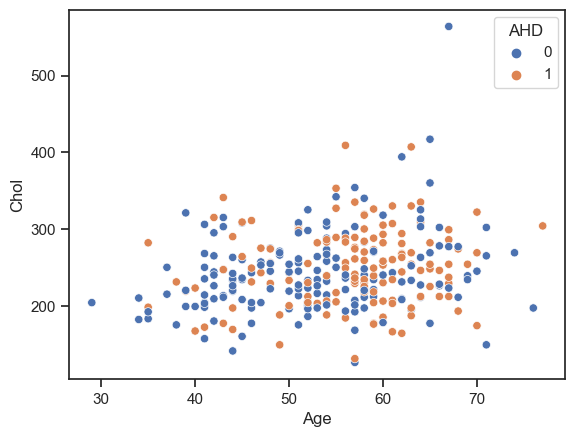

In [36]:
sns.scatterplot(data=data, x="Age", y="Chol", hue="AHD")

<AxesSubplot: xlabel='RestBP', ylabel='MaxHR'>

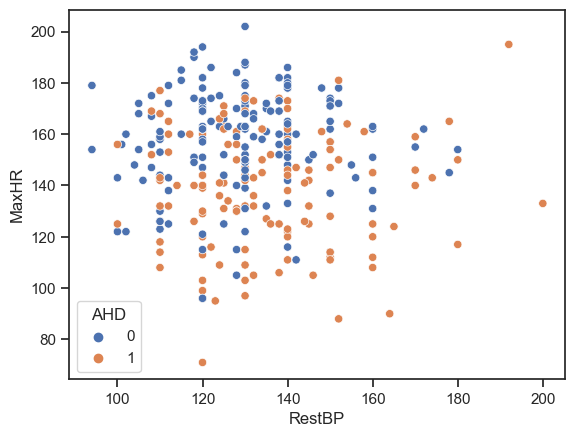

In [37]:
sns.scatterplot(data=data, x="RestBP", y="MaxHR", hue="AHD")

<AxesSubplot: xlabel='Chol', ylabel='Oldpeak'>

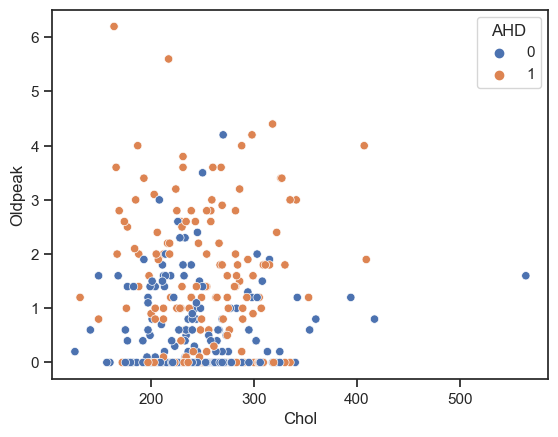

In [38]:
sns.scatterplot(data=data, x="Chol", y="Oldpeak", hue="AHD")

<AxesSubplot: xlabel='MaxHR', ylabel='Age'>

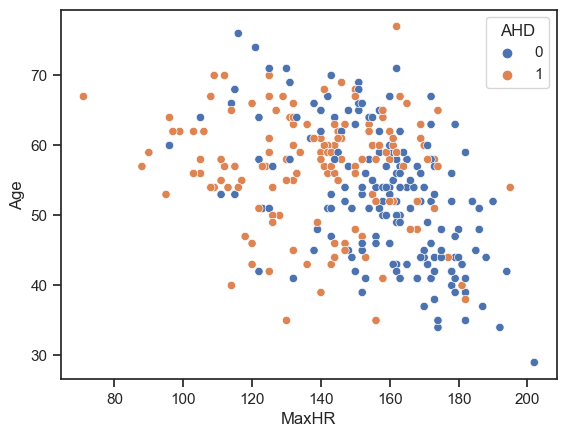

In [39]:
sns.scatterplot(data=data, x="MaxHR", y="Age", hue="AHD")

<AxesSubplot: xlabel='Oldpeak', ylabel='RestBP'>

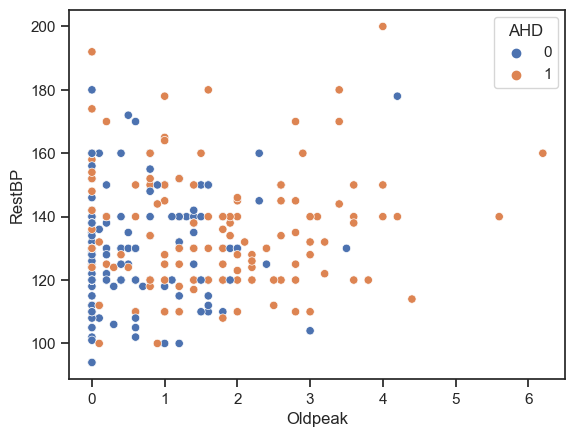

In [40]:
sns.scatterplot(data=data, x="Oldpeak", y="RestBP", hue="AHD")

In [ ]:
plt.pie(da, labels=labels, autopct='%1.1f%%')